In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Ncyc = 10000
Nev = 3000
V_true = 0.3

prob_true = lambda x: 1+V_true*np.cos(2*np.pi*x)

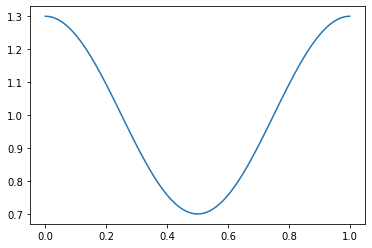

In [3]:
xar=np.linspace(0,1,100)
plt.plot(xar,prob_true(xar))

In [14]:
# First generate data by rejection sampling
events = []
prob_max = 1+V_true
while len(events)<Nev:
    while True:
        x=np.random.uniform(0,1)
        if prob_true(x)>=np.random.uniform(0,prob_max):
            events.append(x+np.random.randint(0,+Ncyc))
            break
events=np.array(events)

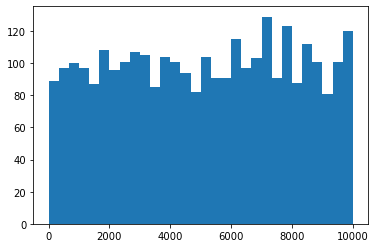

In [15]:
_=plt.hist(events,bins=30)

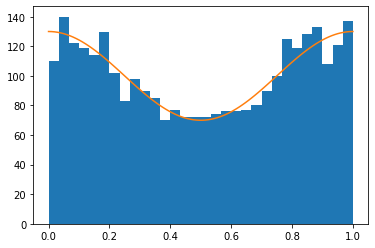

In [16]:
plt.hist(events%1,bins=30)
plt.plot(xar,prob_true(xar)*Nev/30)

In [17]:
import os
if os.path.isdir('chains'):
    os.system('rm -rf chains')
os.mkdir('chains')
from AprilMCMC.Parameter import Parameter
from AprilMCMC.BaseLikelihood import BaseLikelihood
from AprilMCMC.MCMCAnalyzer import  MCMCAnalyzer

class ZhiLike(BaseLikelihood):
    
    def __init__(self,events):
        BaseLikelihood.__init__(self,"astrometry")
        self.phi=0
        self.dfreq=0.00
        self.V=0.3
        self.events=events

    def freeParameters(self):
        return [Parameter("phi",0.0, err=1.0, bounds=(-np.pi,+np.pi)),
                Parameter("dfreq",0.0, err=0.05, bounds=(-0.3,0.3)),
                Parameter("V",0.3, err=0.1,bounds=(0,2.0))]

    def updateParams(self,params):
        for p in params:
            if p.name=="phi":
                self.phi=p.value
            elif p.name=="dfreq":
                self.dfreq=p.value
            elif p.name=="V":
                self.V=p.value

                
    def loglike_wprior(self):
        loglike = np.sum(np.log(1+self.V*np.cos((1+self.dfreq)*2*np.pi*self.events+self.phi)))
        return loglike

In [18]:
   
L=ZhiLike(events[:3000])
MCMCAnalyzer(L,"chains/test",temp=1, nsamp=30000)

Bounds: [-3.14159265 -0.3         0.        ] [3.14159265 0.3        2.        ]
Starting chain...
Still burning in, weight too large
1704
Still burning in, weight too large
2157
Still burning in, weight too large
1874
Still burning in, weight too large
889
Still burning in, weight too large
135
Still burning in, weight too large
164
Still burning in, weight too large
555
Still burning in, weight too large
126
Still burning in, weight too large
318
Still burning in, weight too large
225
Still burning in, weight too large
1282
Still burning in, weight too large
1604
Still burning in, weight too large
400
Still burning in, weight too large
103
Still burning in, weight too large
77
Still burning in, weight too large
163
Still burning in, weight too large
772
Still burning in, weight too large
508
Still burning in, weight too large
37
Still burning in, weight too large
141
Still burning in, weight too large
95
Still burning in, weight too large
86
Still burning in, weight too large
161
Sti

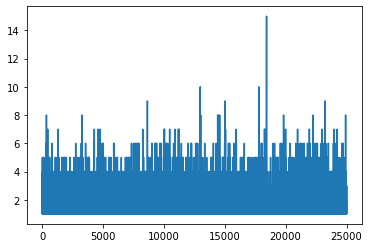

In [19]:
da=np.loadtxt('chains/test.txt')
plt.plot(da[:,0])

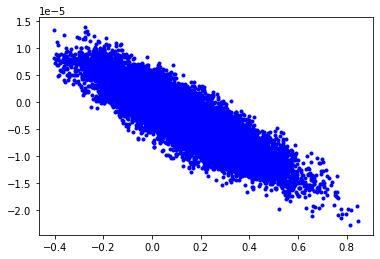

In [20]:
plt.plot(da[:,2],da[:,3],'b.')

In [22]:
L=ZhiLike(events[:3000]-Ncyc//2)
MCMCAnalyzer(L,"chains/test_sym",temp=1, nsamp=30000)

Bounds: [-3.14159265 -0.3         0.        ] [3.14159265 0.3        2.        ]
Starting chain...
Still burning in, weight too large
1813
Still burning in, weight too large
213
Still burning in, weight too large
810
Still burning in, weight too large
410
Still burning in, weight too large
204
Still burning in, weight too large
399
Still burning in, weight too large
322
Still burning in, weight too large
228
Still burning in, weight too large
919
Still burning in, weight too large
303
Still burning in, weight too large
148
Still burning in, weight too large
553
Still burning in, weight too large
419
Still burning in, weight too large
385
Still burning in, weight too large
113
Still burning in, weight too large
59
Still burning in, weight too large
270
Still burning in, weight too large
117
Still burning in, weight too large
116
Still burning in, weight too large
33
Still burning in, weight too large
83
Still burning in, weight too large
41
Still burning in, weight too large
41
Still bu

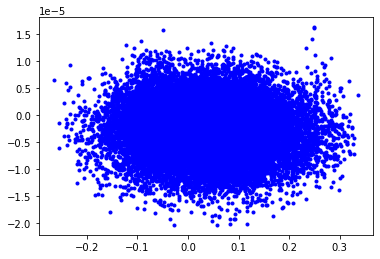

In [25]:
da=np.loadtxt('chains/test_sym.txt')
plt.plot(da[:,2],da[:,3],'b.')


(array([14.,  9., 12., 11.,  8., 13.,  9.,  8.,  9.,  8., 10.,  6.,  9.,
         9.,  5.,  5., 10., 14., 12.,  6., 12., 11., 10.,  8., 12.,  9.,
        11., 12., 12., 16.]),
 array([0.00523354, 0.03838346, 0.07153338, 0.1046833 , 0.13783322,
        0.17098315, 0.20413307, 0.23728299, 0.27043291, 0.30358283,
        0.33673275, 0.36988268, 0.4030326 , 0.43618252, 0.46933244,
        0.50248236, 0.53563228, 0.56878221, 0.60193213, 0.63508205,
        0.66823197, 0.70138189, 0.73453181, 0.76768174, 0.80083166,
        0.83398158, 0.8671315 , 0.90028142, 0.93343134, 0.96658127,
        0.99973119]),
 [<matplotlib.patches.Polygon at 0x7f1c991374c0>])

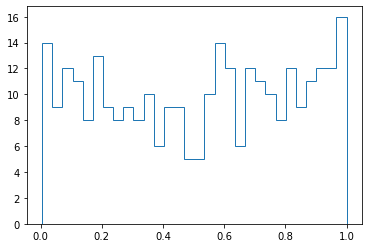

In [26]:
plt.hist(events[:300]%1,bins=30,histtype='step')

Bounds: [-3.14159265 -0.3         0.        ] [3.14159265 0.3        2.        ]
Starting chain...
Still burning in, weight too large
35
Still burning in, weight too large
58
Still burning in, weight too large
104
Still burning in, weight too large
125
Still burning in, weight too large
38
Still burning in, weight too large
35
Still burning in, weight too large
355
Still burning in, weight too large
212
Still burning in, weight too large
213
Still burning in, weight too large
132
Still burning in, weight too large
112
Still burning in, weight too large
33
Still burning in, weight too large
75
Still burning in, weight too large
131
Still burning in, weight too large
38
Still burning in, weight too large
55
Still burning in, weight too large
51
Still burning in, weight too large
41
Still burning in, weight too large
41
Still burning in, weight too large
38
Still burning in, weight too large
34
Still burning in, weight too large
78
Still burning in, weight too large
33
Still burning in, w

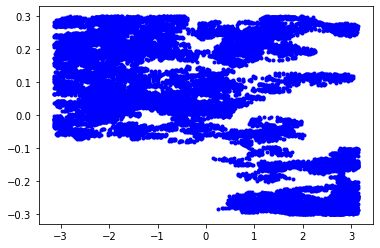

In [27]:
Ls=ZhiLike(events[:300])
os.system('rm chains/*small*')
MCMCAnalyzer(Ls,"chains/test_small",temp=1, nsamp=30000)
da=np.loadtxt('chains/test_small.txt')
plt.plot(da[:,2],da[:,3],'b.')

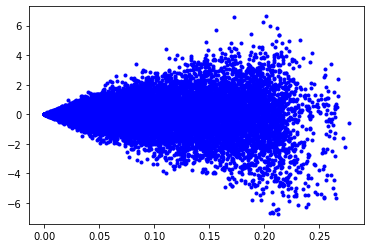

In [33]:
plt.plot(da[5000:,4],da[5000:,1],'b.')